In [ ]:
!pip install imagehash

In [ ]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
from PIL import Image
import cv2
from pathlib import Path
import imagehash
import itertools
import hashlib
import shutil
import gdown
from google.colab import files

In [ ]:
from data_processing_utils.py import move_to_directory, metadata_review, review_target_col,\
collect_filepathes, is_c_hash_function, is_p_hash_function, perceptual_hash, crypto_hash, compute_hash_table,\
find_duplicates, demo_duplicates,remove_files, duplicates_handling_pipeline, remove_duplicates, \
find_target_class_fnames, separate_dataset_classes, has_black_vignette, separate_vignette_images, \
demo_images, add_vignette, split_dataset, show_dirs_len, crop_black_frame, crop_and_save, resize_save_image, prepocess_to_crop

In [ ]:
#move to directory

def move_to_directory(folderpath="/content/data_folder"):
  os.makedirs(folderpath, exist_ok=True)
  uploaded = files.upload()
  for filename in uploaded.keys():
      shutil.move(filename, os.path.join(folderpath, filename))

In [ ]:
def metadata_review(filename):
  print(filename, "\n", " ".join(["_" for i in range(20)]),"\n")
  df = pd.read_csv(filename)
  print(df.columns,"\n")
  print(df.describe(),"\n")
  print(df.info(), "\n")
  return df

def review_target_col(df, col):
  print(df[col].value_counts(), "\n")
  print( (100*df[col].value_counts(normalize=True) ).apply(lambda x: f'{x:.2f}%'), "\n")
  print(df[col].unique(), "\n")


In [ ]:
# kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"svetlanayu","key":"823b4d9905a7344e5829efa3ae2cb96a"}'}

# Data Sources

### PROVe-AI, https://api.isic-archive.com/collections/218/

In [ ]:
folder_path = "/content/PROVe-AI"
move_to_directory(folder_path)

Saving prove-ai_metadata_2025-02-19.csv to prove-ai_metadata_2025-02-19.csv


In [ ]:
!unzip -q -o "{folder_path}/ISIC-images.zip" -d {folder_path}

###ISIC 2020

In [ ]:
folder_path = "/content/2020"
os.makedirs(folder_path, exist_ok=True)

In [ ]:
#metadata
folder_path = "/content/2020"
!wget -O "{folder_path}/ISIC_2020_Training_GroundTruth_v2.csv" "https://isic-challenge-data.s3.amazonaws.com/2020/ISIC_2020_Training_GroundTruth_v2.csv"

!wget -O "{folder_path}/ISIC_2020_Training_Duplicates.csv" "https://isic-challenge-data.s3.amazonaws.com/2020/ISIC_2020_Training_Duplicates.csv"

!wget -O "{folder_path}/ISIC_2020_Test_Metadata.csv" "https://isic-challenge-data.s3.amazonaws.com/2020/ISIC_2020_Test_Metadata.csv"

--2025-04-22 09:54:04--  https://isic-challenge-data.s3.amazonaws.com/2020/ISIC_2020_Training_GroundTruth_v2.csv
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 52.217.201.65, 3.5.13.147, 52.216.40.89, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|52.217.201.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2387418 (2.3M) [text/csv]
Saving to: ‘/content/2020/ISIC_2020_Training_GroundTruth_v2.csv’

/content/2020/ISIC_ 100%[===================>]   2.28M  12.5MB/s    in 0.2s    

2025-04-22 09:54:04 (12.5 MB/s) - ‘/content/2020/ISIC_2020_Training_GroundTruth_v2.csv’ saved [2387418/2387418]



In [ ]:
#test labels
folderpath = "/content/2020"
move_to_directory(folderpath)

Saving challenge-2020-test_metadata.csv to challenge-2020-test_metadata.csv


In [ ]:
# folder_path = "/content/2020"
# !wget "{folder_path}/ISIC_2020_Training_JPEG.zip" https://isic-challenge-data.s3.amazonaws.com/2020/ISIC_2020_Training_JPEG.zip
# !unzip -q -o "{folder_path}/ISIC_2020_Training_JPEG.zip" -d {folder_path}

In [ ]:
# folder_path = "/content/2020"
# !wget -O "{folder_path}/ISIC_2020_Test_JPEG.zip" https://isic-challenge-data.s3.amazonaws.com/2020/ISIC_2020_Test_JPEG.zip
# !unzip -q -o "{folder_path}/ISIC_2020_Test_JPEG.zip" -d {folder_path}

In [ ]:
# 512x512 2020
# folderpath = "/content/2020"
# move_to_directory(folderpath)

load from kaggle 256x256

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!mkdir ~/.kaggle
!kaggle datasets download -d cdeotte/jpeg-melanoma-256x256 -p /content/2020

mkdir: cannot create directory ‘/root/.kaggle’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/cdeotte/jpeg-melanoma-256x256
License(s): CC0-1.0


In [ ]:
!unzip -q -o "/content/2020/jpeg-melanoma-256x256.zip" -d /content/2020

###ISIC 2019

In [ ]:
folder_path = "/content/2019"
os.makedirs(folder_path, exist_ok=True)

In [ ]:
#metadata
folder_path = "/content/2019"
!wget -O "{folder_path}/ISIC_2019_Training_Metadata.csv" https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_Metadata.csv
!wget -O "{folder_path}/ISIC_2019_Training_GroundTruth.csv" https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_GroundTruth.csv
!wget -O "{folder_path}/ISIC_2019_Test_Metadata.csv" https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Test_Metadata.csv
!wget -O "{folder_path}/ISIC_2019_Test_GroundTruth.csv" https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Test_GroundTruth.csv


--2025-04-22 09:39:57--  https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_GroundTruth.csv
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 54.231.193.57, 16.182.101.217, 16.15.194.103, ...
Connecting to isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)|54.231.193.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1291479 (1.2M) [text/csv]
Saving to: ‘/content/2019/ISIC_2019_Training_GroundTruth.csv’

/content/2019/ISIC_ 100%[===================>]   1.23M  7.55MB/s    in 0.2s    

2025-04-22 09:39:58 (7.55 MB/s) - ‘/content/2019/ISIC_2019_Training_GroundTruth.csv’ saved [1291479/1291479]

--2025-04-22 09:39:58--  https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Test_GroundTruth.csv
Resolving isic-challenge-data.s3.amazonaws.com (isic-challenge-data.s3.amazonaws.com)... 54.231.193.57, 16.182.101.217, 16.15.194.103, ...
Connecting to isic-challenge-data.s3.amazonaws.c

In [ ]:
# !wget https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Training_Input.zip
# !unzip -q ISIC_2019_Training_Input.zip

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
folder_path = "/content/2019"
!wget -O "{folder_path}/ISIC_2019_Test_Input.zip" https://isic-challenge-data.s3.amazonaws.com/2019/ISIC_2019_Test_Input.zip
!unzip -q -o "{folder_path}/ISIC_2019_Test_Input.zip" -d {folder_path}

In [ ]:
# 512x512 2019 train
# folderpath = "/content/2019"
# move_to_directory(folderpath)

load from kaggle train 2019 256x256

In [ ]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
folder_path = "/content/2019"
os.makedirs(folder_path, exist_ok=True)
!kaggle datasets download -d "cdeotte/jpeg-isic2019-256x256" -p /content/2019
!unzip -q "/content/2019/jpeg-isic2019-256x256" -d /content/2019


Dataset URL: https://www.kaggle.com/datasets/cdeotte/jpeg-isic2019-256x256
License(s): CC0-1.0


# Доповнення тестового датасету зображеннями 2019 року, негативний клас

In [ ]:
df_test_2019 = pd.read_csv('/content/2019/ISIC_2019_Test_GroundTruth.csv')
df_test_2019["image"]=df_test_2019["image"].apply(lambda x: x+".jpg")
positive_col_mask = df_test_2019['MEL'].isin([1, "melanoma"])
positive_im = df_test_2019[positive_col_mask]["image"]
files_to_find = positive_im.tolist()
# files_to_find = np.array(positive_im)

source_dir = '2019/test'
dest_dir = '2019_new/test'
separate_dataset_classes(source_dir, dest_dir, files_to_find)

classes = ["melanoma", "other"]
for cl in classes:
  print(f'2019_new/test/{cl}', len(os.listdir('2019_new/test' + "/" + cl)))


2019_new/test/melanoma 1327
2019_new/test/other 6911


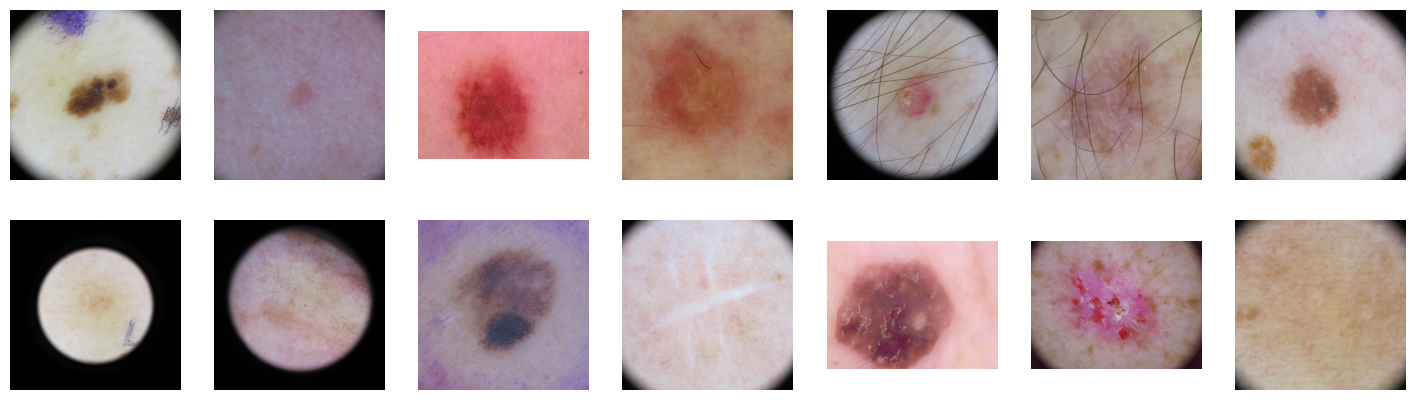

In [ ]:
demo_path = Path('/content/2019_new/test/other')
selection = np.random.choice(os.listdir(demo_path), size=14, replace=False)
images_pathes_list = []
for im in selection:
  images_pathes_list.append(demo_path / im)

demo_images(images_pathes_list)

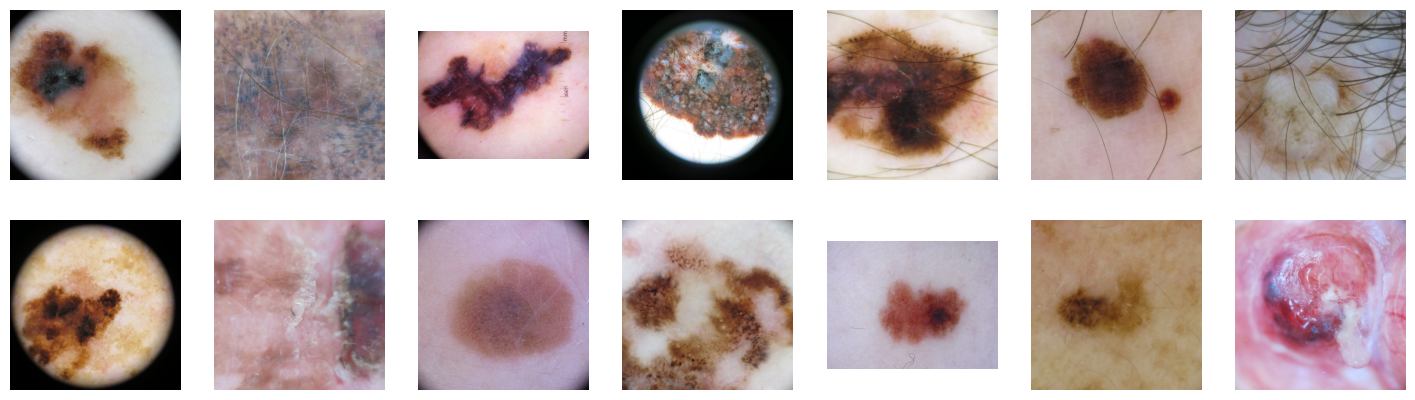

In [ ]:
demo_path = Path('/content/2019_new/test/melanoma')
selection = np.random.choice(os.listdir(demo_path), size=14, replace=False)
images_pathes_list = []
for im in selection:
  images_pathes_list.append(demo_path / im)

demo_images(images_pathes_list)

In [ ]:
def resize_save_image(filename, source_dir, dest_dir, size=(256, 256)):

  height, width = size

  filepath = os.path.join(source_dir, filename)
  image = cv2.imread(filepath)
  if image is None:
    print(f"Couldn't load '{filepath}'.")
  else:
    resized_image = cv2.resize(image, (width, height))
  # resized_image = cv2.resize(image, (width, height), interpolation=cv2.INTER_LINEAR)
    cv2.imwrite(os.path.join(dest_dir, filename), resized_image)

Для зменшення розміру даних зменшити розмір зображень негативного класу тестового набору 2019 року до 256x256.

In [ ]:
source_dir = "/content/2019_new/test/other"
os.makedirs('/content/2019_new/test/other_resized', exist_ok=True)
dest_dir = "/content/2019_new/test/other_resized"

size = (256, 256)

for file in os.listdir(source_dir):
	resize_save_image(file, source_dir, dest_dir, size)

print("Done")

In [ ]:
shutil.rmtree('/content/2019_new/test/other')
# rename 'other_resized' to 'other'

In [ ]:
!zip -q -r 2019_test.zip /content/2019_new/
from google.colab import files
files.download("2019_test.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Перевірити дублікати в тестовому наборі 2019+2020 всі класи

Number of duplicates pairs: 84
[('ISIC_9982577.jpg', 'ISIC_9008728.jpg'), ('ISIC_3666478.jpg', 'ISIC_2862111.jpg')]
Examples to remove: ['2020/test/ISIC_3447990.jpg', '2020/test/ISIC_6946895.jpg', '2020/test/ISIC_8648368.jpg', '2020/test/ISIC_1437807.jpg', '2020/test/ISIC_8986079.jpg']
Removed 84 files


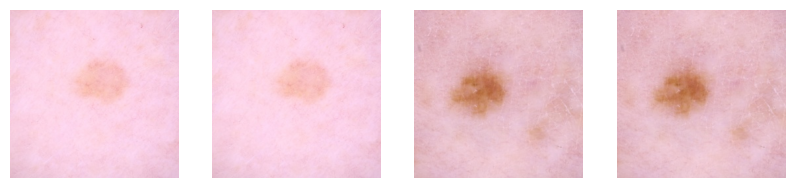

In [ ]:
dupl_pairs = duplicates_handling_pipeline("2020/test" , method="c", hash_function=hashlib.md5, slice_len=2)
remove_duplicates("2020/test", dupl_pairs)

In [ ]:
os.makedirs('duplicates_test', exist_ok=True)

In [ ]:
!cp /content/2019/test/* /content/duplicates_test/
!cp /content/2020/test/* /content/duplicates_test/

In [ ]:
# !mv /content/2019/test/* /content/2020/test/

Number of duplicates pairs: 84
[('ISIC_9008728.jpg', 'ISIC_9982577.jpg'), ('ISIC_2862111.jpg', 'ISIC_3666478.jpg')]
Examples to remove: ['duplicates_test/ISIC_6248112.jpg', 'duplicates_test/ISIC_6946895.jpg', 'duplicates_test/ISIC_1437807.jpg', 'duplicates_test/ISIC_1663074.jpg', 'duplicates_test/ISIC_8661785.jpg']
Removed 84 files


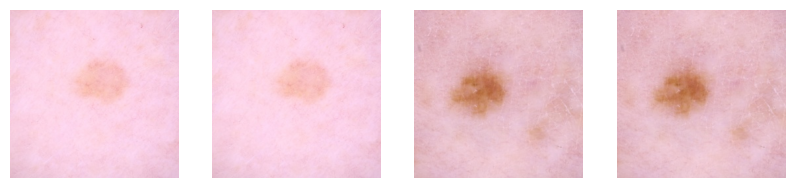

In [ ]:
dupl_pairs = duplicates_handling_pipeline("duplicates_test" , method="c", hash_function=hashlib.md5, slice_len=2)
remove_duplicates("duplicates_test", dupl_pairs)

In [ ]:
dupl_pairs = duplicates_handling_pipeline("duplicates_test" , method="h", hash_function=hashlib.md5, slice_len=2)

Number of duplicates pairs: 0
[]


<Figure size 1000x0 with 0 Axes>

In [ ]:
# shutil.rmtree("/content/duplicates_test")

In [ ]:
source_dir = "/content/duplicates_test"
os.makedirs('/content/duplicates_test_resized', exist_ok=True)
dest_dir = "/content/duplicates_test_resized"

size = (256, 256)

for file in os.listdir(source_dir):
	resize_save_image(file, source_dir, dest_dir, size)

print("Done")

Couldn't load '/content/duplicates_test/LICENSE.txt'.
Couldn't load '/content/duplicates_test/ATTRIBUTION.txt'.
Done


In [ ]:
dupl_pairs = duplicates_handling_pipeline("duplicates_test" , method="h", hash_function=hashlib.md5, slice_len=2)

Number of duplicates pairs: 0
[]


<Figure size 1000x0 with 0 Axes>

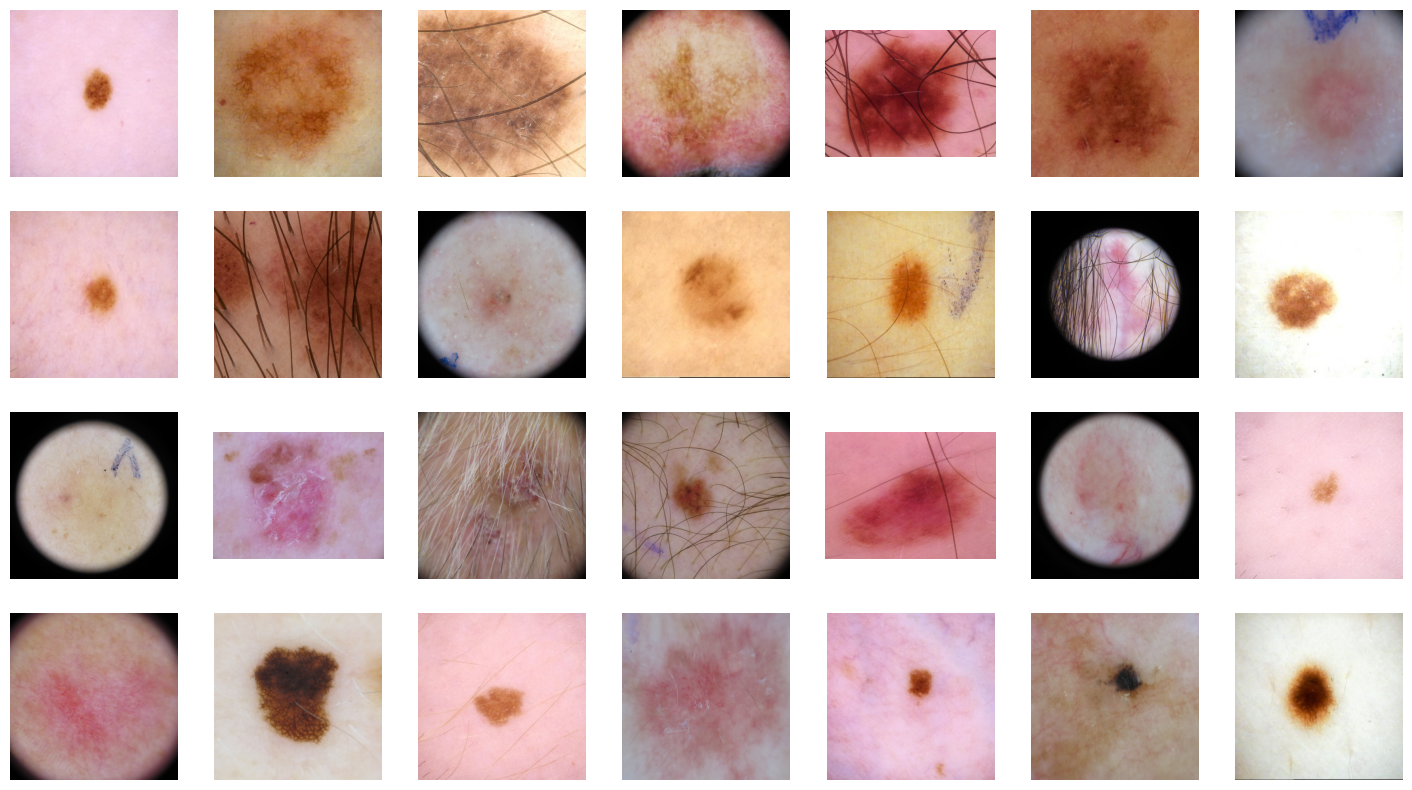

In [ ]:
demo_path = Path('duplicates_test')
selection = np.random.choice(os.listdir(demo_path), size=28, replace=False)
images_pathes_list = []
for im in selection:
  images_pathes_list.append(demo_path / im)

demo_images(images_pathes_list)

#Доповнення тренувального датасету зображеннями 2019 року, негативний клас


In [ ]:
df_train_2019 = pd.read_csv('/content/2019/ISIC_2019_Training_GroundTruth.csv')
df_train_2019["image"]=df_train_2019["image"].apply(lambda x: x+".jpg")
positive_col_mask = df_train_2019['MEL'].isin([1, "melanoma"])
positive_im = df_train_2019[positive_col_mask]["image"]
files_to_find = positive_im.tolist()
# files_to_find = np.array(positive_im)

source_dir = '2019/train'
dest_dir = '2019_new/train'
separate_dataset_classes(source_dir, dest_dir, files_to_find)

classes = ["melanoma", "other"]
for cl in classes:
  print(f'2019_new/train/{cl}', len(os.listdir('2019_new/train' + "/" + cl)))


2019_new/train/melanoma 4513
2019_new/train/other 20768


In [ ]:
!zip -q -r 2019_train.zip /content/2019_new/
from google.colab import files
files.download("2019_train.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Перевірити дублікати в тренувальному наборі 2019+2020 (негативний клас)

В позитивному класі дублікатів не було виявлено після об'єднання.

In [ ]:
os.makedirs('duplicates_train', exist_ok=True)
!cp /content/2019/train/* /content/duplicates_train/
!cp /content/2020/train/* /content/duplicates_train/

In [ ]:
dupl_pairs = duplicates_handling_pipeline("duplicates_train" , method="c", hash_function=hashlib.md5, slice_len=2)
# remove_duplicates("duplicates_test", dupl_pairs)

Number of duplicates pairs: 0
[]


<Figure size 1000x0 with 0 Axes>

In [ ]:
dupl_pairs = duplicates_handling_pipeline("duplicates_train" , method="h", hash_function=hashlib.md5, slice_len=2)

Number of duplicates pairs: 0
[]


<Figure size 1000x0 with 0 Axes>

### Виконати передобробку зображень тренувального набору 2019 року для видалення чорних країв.

In [ ]:
# https://drive.google.com/file/d/1jHMWO2to_VokF9gwd6wb5eKYHly8KZvc/view?usp=sharing
file_id = "1jHMWO2to_VokF9gwd6wb5eKYHly8KZvc"
url = f"https://drive.google.com/uc?id={file_id}"
output = "2019_all.zip"

gdown.download(url, output, quiet=False)
!unzip -q 2019_all.zip

Downloading...
From (original): https://drive.google.com/uc?id=1jHMWO2to_VokF9gwd6wb5eKYHly8KZvc
From (redirected): https://drive.google.com/uc?id=1jHMWO2to_VokF9gwd6wb5eKYHly8KZvc&confirm=t&uuid=40757142-b82e-4770-a752-2866f3868c36
To: /content/2019_all.zip
100%|██████████| 1.26G/1.26G [00:19<00:00, 64.4MB/s]


In [ ]:
# перевірка папки 2019_new/train/other
directory = Path("/content/2019_all/train/other")
vignette_dict_tr_other = separate_vignette_images(directory)
print(f"With vignette: {len(vignette_dict_tr_other['has'])}")
print(f"Without vignette: {len(vignette_dict_tr_other['not_has'])}")
print(len(os.listdir(directory)))

With vignette: 2963
Without vignette: 17805
20768


In [ ]:
for im_path in vignette_dict_tr_other['has']:
  im_path = str(im_path)
  crop_and_save(im_path)

In [ ]:
# перевірка папки 2019_new/train/melanoma
directory = Path("/content/2019_all/train/melanoma")
vignette_dict_tr_mel = separate_vignette_images(directory)
print(f"With vignette: {len(vignette_dict_tr_mel['has'])}")
print(f"Without vignette: {len(vignette_dict_tr_mel['not_has'])}")
print(len(os.listdir(directory)))

With vignette: 1082
Without vignette: 3431
4513


In [ ]:
for im_path in vignette_dict_tr_mel['has']:
  im_path = str(im_path)
  crop_and_save(im_path)

In [ ]:
!zip -q -r 2019_all_croppedtr.zip /content/2019_all/
from google.colab import files
files.download("2019_all_croppedtr.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Перевірка з оригінальними зображеннями на дублікати з набору prove_ai для доповнення валідаційного набору

In [ ]:
# from google.colab import files
# files.upload()

folder_path = "/content/PROVe-AI"
!unzip -q -o "ISIC-images.zip" -d {folder_path}

In [ ]:
folder1 = "/content/PROVe-AI"
folder2 = "/content/2020/train"

files_folder1 = set(os.listdir(folder1))
files_folder2 = set(os.listdir(folder2))
duplicate_files = files_folder1.intersection(files_folder2)

# Видалити файли з folder2
deleted_count = 0
for file in duplicate_files:
    file_path = os.path.join(folder2, file)
    try:
        os.remove(file_path)
        deleted_count += 1
    except Exception as e:
        print(f"Error {file}: {e}")

print(deleted_count)


Number of duplicates pairs: 433
[('ISIC_4389708.jpg', 'ISIC_6927916.jpg'), ('ISIC_0441886.jpg', 'ISIC_9618840.jpg'), ('ISIC_8317513.jpg', 'ISIC_0721819.jpg'), ('ISIC_5188723.jpg', 'ISIC_3945730.jpg'), ('ISIC_2636012.jpg', 'ISIC_9917477.jpg'), ('ISIC_9005542.jpg', 'ISIC_0720915.jpg')]


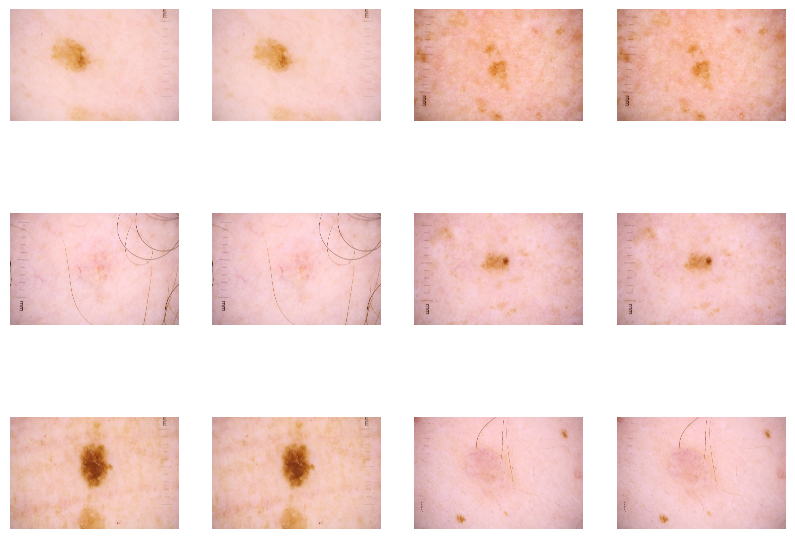

In [ ]:
directory = "/content/2020/train"
dupl_pairs = duplicates_handling_pipeline(directory, method="c", hash_function=hashlib.md5, slice_len=6)

In [ ]:
remove_duplicates("/content/2020/train", dupl_pairs)

Examples to remove: ['/content/2020/train/ISIC_6363173.jpg', '/content/2020/train/ISIC_0707446.jpg', '/content/2020/train/ISIC_7948595.jpg', '/content/2020/train/ISIC_0386664.jpg', '/content/2020/train/ISIC_7311305.jpg']
Removed 433 files


In [ ]:
!cp /content/PROVe-AI/* /content/2020/train/

In [ ]:
dupl_pairs = duplicates_handling_pipeline(directory, method="c", hash_function=hashlib.md5, slice_len=6)

Number of duplicates pairs: 0
[]


<Figure size 1000x0 with 0 Axes>

В навчальному наборі 2020 немає дублікатів з prove-ai, за 2019 рік розмір зображень інший.

In [ ]:
shutil.rmtree('/content/2020/train/')

Number of duplicates pairs: 78
[('ISIC_0517531.jpg', 'ISIC_2403393.jpg'), ('ISIC_6827668.jpg', 'ISIC_3377854.jpg'), ('ISIC_9155599.jpg', 'ISIC_8166745.jpg'), ('ISIC_8750817.jpg', 'ISIC_4990272.jpg'), ('ISIC_2258860.jpg', 'ISIC_4261613.jpg'), ('ISIC_5576295.jpg', 'ISIC_3656810.jpg')]


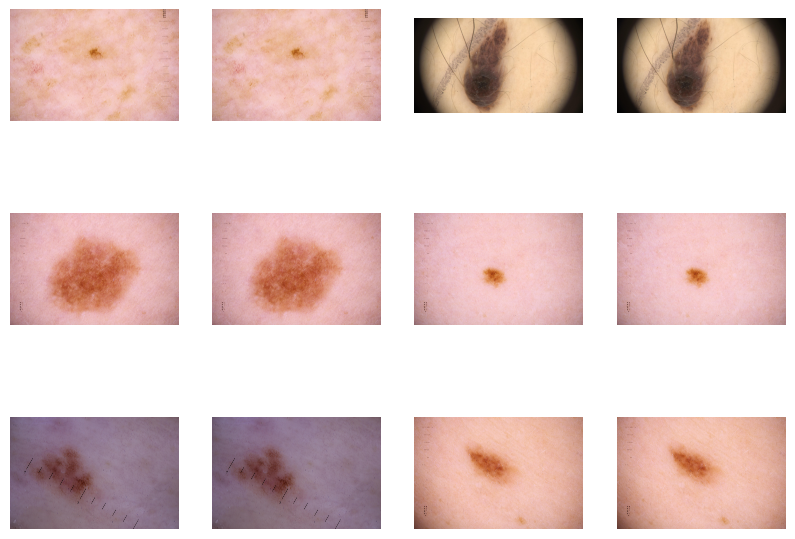

In [ ]:
directory = "/content/2020/ISIC_2020_Test_Input"
dupl_pairs = duplicates_handling_pipeline(directory, method="c", hash_function=hashlib.md5, slice_len=6)

In [ ]:
remove_duplicates("/content/2020/ISIC_2020_Test_Input", dupl_pairs)

Examples to remove: ['/content/2020/ISIC_2020_Test_Input/ISIC_1259317.jpg', '/content/2020/ISIC_2020_Test_Input/ISIC_5185780.jpg', '/content/2020/ISIC_2020_Test_Input/ISIC_3377854.jpg', '/content/2020/ISIC_2020_Test_Input/ISIC_5198297.jpg', '/content/2020/ISIC_2020_Test_Input/ISIC_4019458.jpg']
Removed 78 files


In [ ]:
!cp /content/PROVe-AI/* /content/2020/ISIC_2020_Test_Input/

In [ ]:
dupl_pairs = duplicates_handling_pipeline(directory, method="c", hash_function=hashlib.md5, slice_len=6)

Number of duplicates pairs: 0
[]


<Figure size 1000x0 with 0 Axes>

In [ ]:
# shutil.rmtree("/content/prove_ai_split")

In [ ]:
# завантажити resized dataset
# from google.colab import files
# files.upload()

folder_path = "/content/prove_ai_split"
!unzip -q -o "/content/prove-ai-resized.zip" -d {folder_path}

В тестовому наборі немає дублікатів

In [ ]:
metadata_summary_df = pd.DataFrame([('prove-ai_metadata_2025-02-19.csv', 'isic_id','diagnosis')], columns=['filename','image_col','target_col_name'])
source_dir = '/content/prove_ai_split/prove-ai-resized'
dest_dir = '/content/prove_ai_split' + "/" + 'validation'
metadata_file_params = metadata_summary_df.iloc[0]
files_to_find = find_target_class_fnames('/content', metadata_file_params)
print(len(files_to_find))
separate_dataset_classes(source_dir, dest_dir, files_to_find)
classes = ["melanoma", "other"]
for cl in classes:
  print( f'{dest_dir}/{cl}', len(os.listdir(dest_dir +  "/" + cl)))

95
/content/prove_ai_split/validation/melanoma 95
/content/prove_ai_split/validation/other 508


In [ ]:
!zip -q -r prove_ai_split.zip /content/prove_ai_split/validation
from google.colab import files
files.download("prove_ai_split.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>